# 2. Voltage smoothing [10 pts]

#### by Roumen Guha, on Sunday, February 26th, 2017

We would like to send a sequence of voltage inputs to the manipulator arm of a robot. The desired signal is shown in the plot below (also available in __voltages.csv__)

<img src="2.png">

Unfortunately, abrupt changes in voltage cause undue wear and tear on the motors over time, so we would like to modify the signal so that the transitions are smoother. If the voltages above are given by $v_1, v_2, . . . , v_{200}$, one way to characterize smoothness is via the sum of squared differences: 

<img src="2R.png">

__When $R(v)$ is smaller, the voltage is smoother.__ Solve a regularized least squares problem that explores the tradeoff between matching the desired signal above and making the signal smooth. Explain your reasoning, and include a plot comparing the desired voltages with your smoothed voltages.

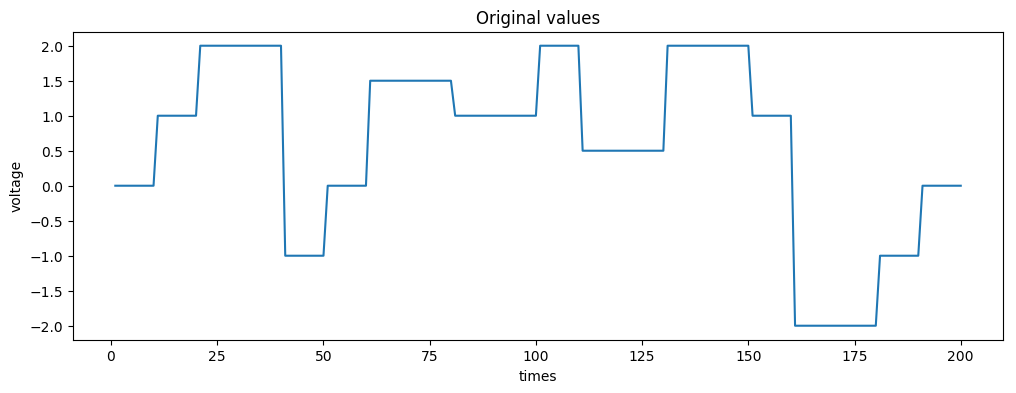

In [195]:
raw = readcsv("voltages.csv");
voltages = raw[:,1]; # inputs
times = [1:length(voltages);]

using PyPlot
figure(figsize=(12,4))
plot(times, voltages)
title("Original values")
xlabel("times")
ylabel("voltage")
;

In [242]:
using JuMP, Mosek, Gurobi

function optimalVoltages(λ)

    m = Model(solver = GurobiSolver(OutputFlag=0))

    @variable(m, v[1:200])
        
    @objective(m, Min, sum((voltages[i] - v[i]).^2 for i in 1:times[end]) + λ*sum((v[i + 1] - v[i]).^2 for i in 1:times[end]-1))

    solve(m)

    return (getvalue(v))
end;

The objective of this model is where the magic happens. I created a variable for the model, v, and in the objective stated that I'd like the difference between v and the intended voltages to be as small as possible. I also introduced an expression that wants the differences between the adjacent v values to be as small as possible so that changes in voltages are not too abrupt, with this expression being multiplied by λ, to be used as a tradeoff paramater. Below is a plot with 3 values of λ, at 0.1, 1.0, and 10.0.

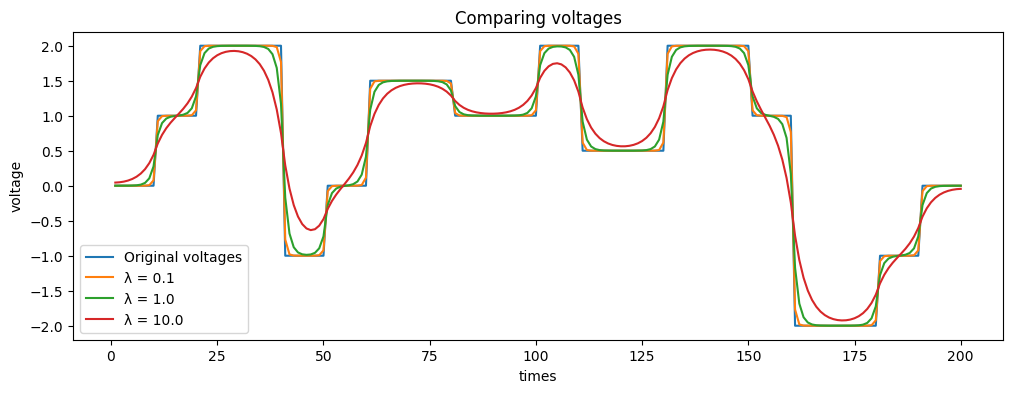

In [257]:
using PyPlot
figure(figsize=(12,4))
plot(times, voltages)
plot(times, optimalVoltages(0.1))
plot(times, optimalVoltages(1))
plot(times, optimalVoltages(10))
title("Comparing voltages")
xlabel("times")
ylabel("voltage")
legend(["Original voltages", "λ = 0.1", "λ = 1.0", "λ = 10.0"], loc="lower left");